# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moh Asrori
- **Email:** Irvanea1@gmail.com
- **ID Dicoding:** Moh Asrori

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda?

- Kapan waktu puncak penyewaan sepeda berdasarkan jam dan bagaimana perbedaannya antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("D:\Project\Intermediate-data_saince\Submission\data\day.csv")
hour_df = pd.read_csv("D:\Project\Intermediate-data_saince\Submission\data\hour.csv")

day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset hourly memungkinkan analisis per jam
- Dataset daily memungkinkan analisis musiman / tren harian
- Gabungan day + hour memungkinkan menjawab pertanyaan bisnis dengan detail

### Assessing Data

In [5]:
day_df.info()
hour_df.info()

day_df.isnull().sum()
hour_df.isnull().sum()

day_df.duplicated().sum()
hour_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

0

**Insight:**
- Kedua dataset (`day_df` dan `hour_df`) **tidak memiliki missing value**. Semua kolom terisi penuh sehingga tidak perlu imputasi.
- Tidak ditemukan **duplikasi** pada kedua dataset (`duplicated().sum() = 0`), data sudah unik per record.
- Tipe data sudah sesuai:
   - Kolom numerik (`int64` / `float64`) untuk analisis statistik.
   - Kolom `dteday` bertipe object, bisa diubah ke datetime jika diperlukan untuk analisis tren.
- Dataset `day_df` berisi 731 baris (harian) dan `hour_df` berisi 17379 baris (per jam), cukup untuk analisis musiman dan jam sibuk.

### Cleaning Data

In [6]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weathersit_map = {
    1:'Clear', 
    2:'Mist/Cloudy', 
    3:'Light Snow/Rain', 
    4:'Heavy Rain/Snow'
}

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_map)

bins = [0,5,10,15,19,23]
labels = ['Late Night','Morning','Afternoon','Evening','Night']
hour_df['hour_bin'] = pd.cut(hour_df['hr'], bins=bins, labels=labels, right=True)

**Insight Cleaning Data:**

- Kolom `dteday` sudah dikonversi ke datetime, memudahkan analisis tren per hari atau bulan.
- Kolom kategorikal `season` dan `weathersit` telah diubah menjadi label deskriptif, sehingga visualisasi lebih mudah dibaca.
- Binning jam (`hour_bin`) menyiapkan data untuk analisis puncak penyewaan per waktu.
- Nilai numerik (temp, atemp, hum, windspeed, cnt) valid dan siap untuk analisis tanpa modifikasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Eksplore pertanyaan 1: Pengaruh Musim & Cuaca

In [7]:
print("=== Statistik Penyewaan per Musim ===")
season_stats = hour_df.groupby('season')['cnt'].agg(['mean', 'median', 'std', 'min', 'max', 'sum'])
print(season_stats.round(2))

print("\n=== Statistik Penyewaan per Kondisi Cuaca ===")
weather_stats = hour_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'std', 'min', 'max', 'sum'])
print(weather_stats.round(2))

print("\n=== Persentase Total Penyewaan per Musim ===")
season_total = hour_df.groupby('season')['cnt'].sum()
season_pct = (season_total / season_total.sum() * 100).round(2)
print(season_pct)


=== Statistik Penyewaan per Musim ===
          mean  median     std  min  max      sum
season                                           
Fall    236.02   199.0  197.71    1  977  1061129
Spring  111.11    76.0  119.22    1  801   471348
Summer  208.34   165.0  188.36    1  957   918589
Winter  198.87   155.5  182.97    1  967   841613

=== Statistik Penyewaan per Kondisi Cuaca ===
                   mean  median     std  min  max      sum
weathersit                                                
Clear            204.87   159.0  189.49    1  977  2338173
Heavy Rain/Snow   74.33    36.0   77.93   23  164      223
Light Snow/Rain  111.58    63.0  133.78    1  891   158331
Mist/Cloudy      175.17   133.0  165.43    1  957   795952

=== Persentase Total Penyewaan per Musim ===
season
Fall      32.23
Spring    14.32
Summer    27.90
Winter    25.56
Name: cnt, dtype: float64


### Eksplore pertanyaan 2: Waktu Puncak & Hari Kerja vs Libur

In [8]:
print("\n=== Rata-rata Penyewaan per Jam ===")
hourly_avg = hour_df.groupby('hr')['cnt'].mean().round(2)
print(hourly_avg)

print("\n=== Perbandingan Hari Kerja vs Hari Libur ===")
workday_stats = hour_df.groupby('workingday')['cnt'].agg(['mean', 'sum', 'count'])
workday_stats.index = ['Hari Libur', 'Hari Kerja']
print(workday_stats.round(2))

print("\n=== Jam Puncak pada Hari Kerja ===")
workday_peak = hour_df[hour_df['workingday']==1].groupby('hr')['cnt'].mean().nlargest(5)
print(workday_peak.round(2))

print("\n=== Jam Puncak pada Hari Libur ===")
holiday_peak = hour_df[hour_df['workingday']==0].groupby('hr')['cnt'].mean().nlargest(5)
print(holiday_peak.round(2))

print("\n=== Korelasi Variabel dengan Jumlah Penyewaan ===")
correlation_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_matrix = hour_df[correlation_cols].corr()['cnt'].drop('cnt').round(3)
print(corr_matrix)



=== Rata-rata Penyewaan per Jam ===
hr
0      53.90
1      33.38
2      22.87
3      11.73
4       6.35
5      19.89
6      76.04
7     212.06
8     359.01
9     219.31
10    173.67
11    208.14
12    253.32
13    253.66
14    240.95
15    251.23
16    311.98
17    461.45
18    425.51
19    311.52
20    226.03
21    172.31
22    131.34
23     87.83
Name: cnt, dtype: float64

=== Perbandingan Hari Kerja vs Hari Libur ===
              mean      sum  count
Hari Libur  181.41  1000269   5514
Hari Kerja  193.21  2292410  11865

=== Jam Puncak pada Hari Kerja ===
hr
17    525.29
18    492.23
8     477.01
19    348.40
16    293.12
Name: cnt, dtype: float64

=== Jam Puncak pada Hari Libur ===
hr
13    372.73
12    366.26
14    364.65
15    358.81
16    352.73
Name: cnt, dtype: float64

=== Korelasi Variabel dengan Jumlah Penyewaan ===
temp         0.405
atemp        0.401
hum         -0.323
windspeed    0.093
Name: cnt, dtype: float64


VISUALISASI EDA

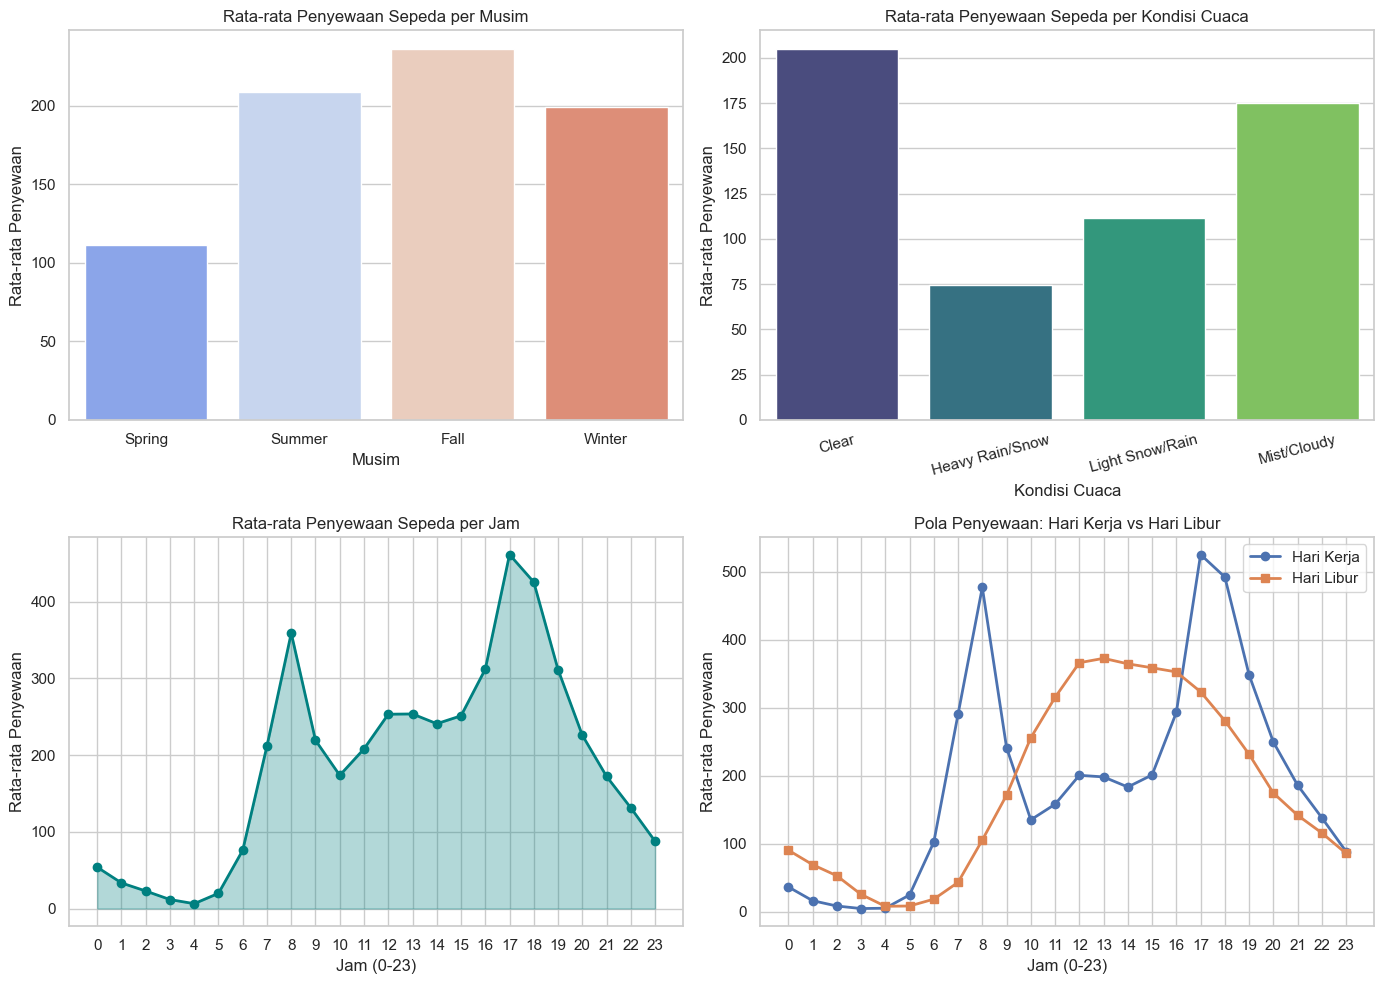

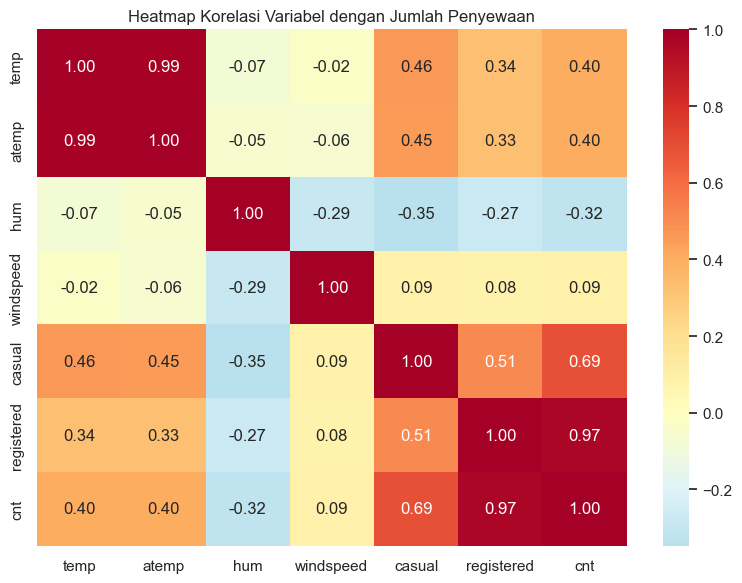

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Rata-rata penyewaan per musim
season_avg = hour_df.groupby('season')['cnt'].mean().reset_index()
sns.barplot(data=season_avg, x='season', y='cnt', palette='coolwarm', ax=axes[0,0], 
            order=['Spring', 'Summer', 'Fall', 'Winter'])
axes[0,0].set_title('Rata-rata Penyewaan Sepeda per Musim', fontsize=12)
axes[0,0].set_xlabel('Musim')
axes[0,0].set_ylabel('Rata-rata Penyewaan')

# 2. Rata-rata penyewaan per kondisi cuaca
weather_avg = hour_df.groupby('weathersit')['cnt'].mean().reset_index()
sns.barplot(data=weather_avg, x='weathersit', y='cnt', palette='viridis', ax=axes[0,1])
axes[0,1].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca', fontsize=12)
axes[0,1].set_xlabel('Kondisi Cuaca')
axes[0,1].set_ylabel('Rata-rata Penyewaan')
axes[0,1].tick_params(axis='x', rotation=15)

# 3. Pola penyewaan per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean()
axes[1,0].plot(hourly_avg.index, hourly_avg.values, marker='o', color='teal', linewidth=2)
axes[1,0].fill_between(hourly_avg.index, hourly_avg.values, alpha=0.3, color='teal')
axes[1,0].set_title('Rata-rata Penyewaan Sepeda per Jam', fontsize=12)
axes[1,0].set_xlabel('Jam (0-23)')
axes[1,0].set_ylabel('Rata-rata Penyewaan')
axes[1,0].set_xticks(range(0, 24))

# 4. Perbandingan hari kerja vs hari libur per jam
workday_hourly = hour_df[hour_df['workingday']==1].groupby('hr')['cnt'].mean()
holiday_hourly = hour_df[hour_df['workingday']==0].groupby('hr')['cnt'].mean()
axes[1,1].plot(workday_hourly.index, workday_hourly.values, marker='o', label='Hari Kerja', linewidth=2)
axes[1,1].plot(holiday_hourly.index, holiday_hourly.values, marker='s', label='Hari Libur', linewidth=2)
axes[1,1].set_title('Pola Penyewaan: Hari Kerja vs Hari Libur', fontsize=12)
axes[1,1].set_xlabel('Jam (0-23)')
axes[1,1].set_ylabel('Rata-rata Penyewaan')
axes[1,1].set_xticks(range(0, 24))
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
corr_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.heatmap(hour_df[corr_cols].corr(), annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Heatmap Korelasi Variabel dengan Jumlah Penyewaan')
plt.tight_layout()
plt.show()

**Insight EDA:**

**Pertanyaan 1 - Pengaruh Musim & Cuaca:**
- Musim **Fall** (Gugur) memiliki rata-rata penyewaan tertinggi, diikuti Summer dan Winter. Spring memiliki penyewaan terendah.
- Cuaca **Clear** (cerah) menghasilkan penyewaan sepeda tertinggi, sedangkan kondisi cuaca buruk (hujan/salju lebat) hampir menghentikan aktivitas penyewaan.
- Terdapat korelasi positif antara suhu (`temp`) dengan jumlah penyewaan - semakin hangat, semakin banyak penyewaan.
- Kelembaban (`hum`) memiliki korelasi negatif dengan penyewaan sepeda.

**Pertanyaan 2 - Waktu Puncak & Hari Kerja vs Libur:**
- **Hari Kerja:** Jam puncak terjadi pada pukul **08:00** (berangkat kerja) dan **17:00-18:00** (pulang kerja), menunjukkan pola commuter.
- **Hari Libur:** Jam puncak lebih tersebar di siang hari (sekitar **12:00-15:00**), menunjukkan pola rekreasi.
- Rata-rata penyewaan per jam pada hari kerja lebih tinggi karena penggunaan rutin untuk transportasi.
- Pola binning waktu menunjukkan **Evening** dan **Afternoon** sebagai periode tersibuk secara keseluruhan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda?

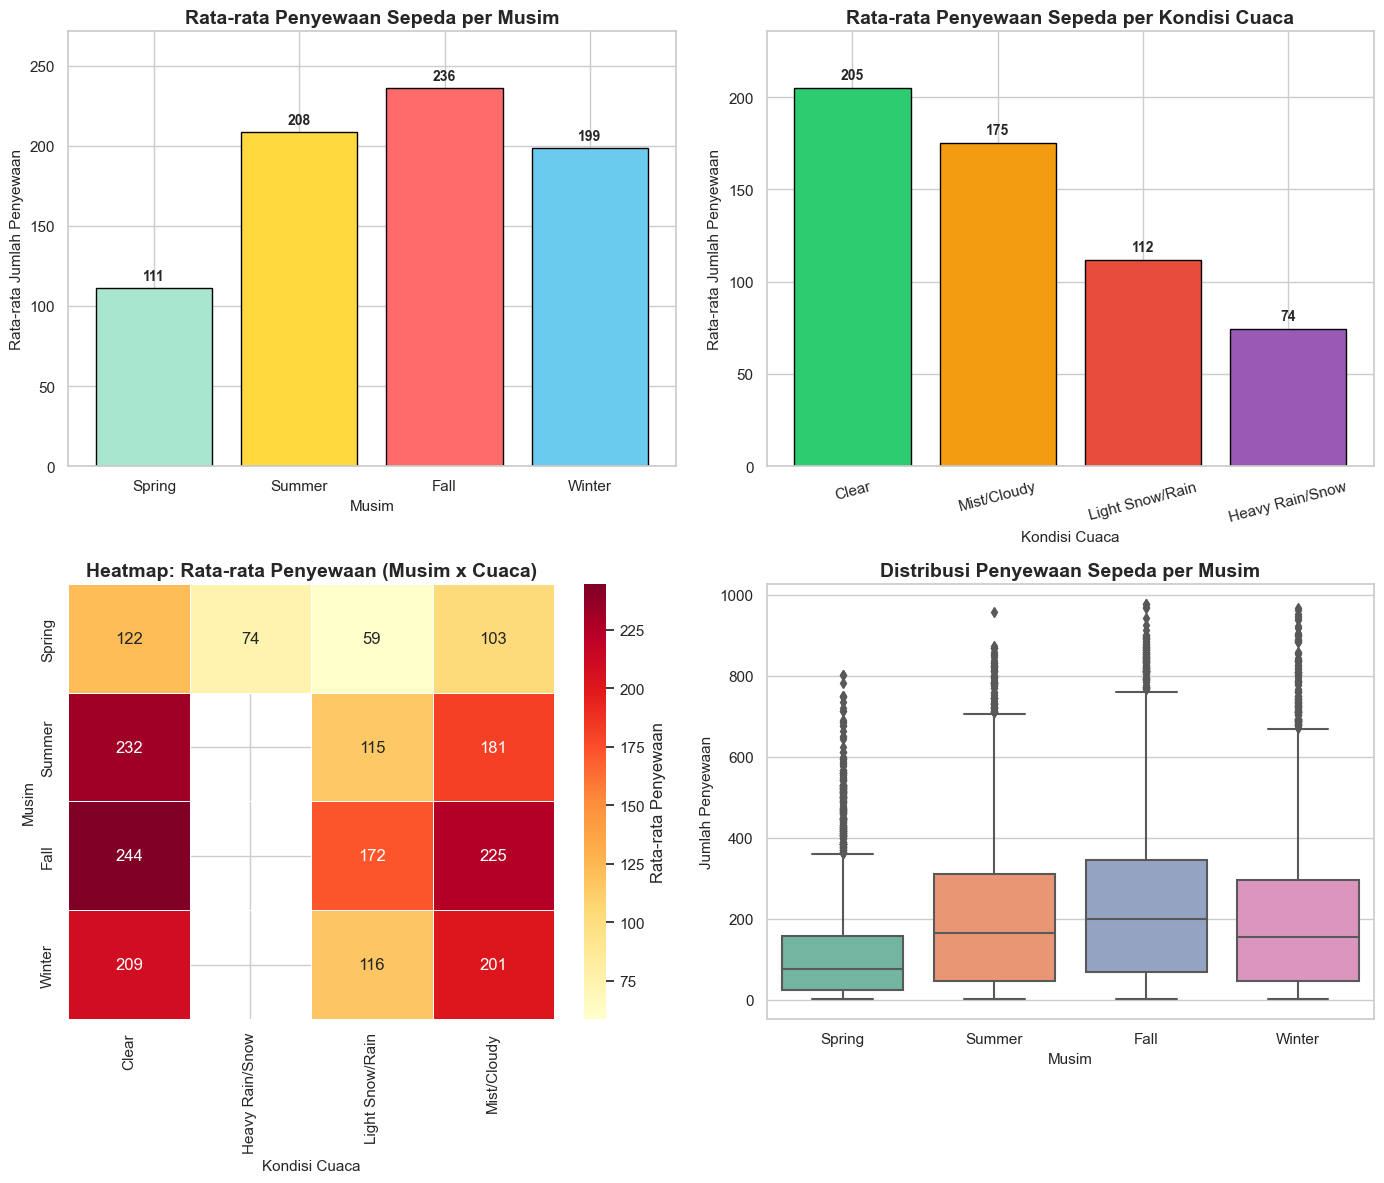

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Bar Chart - Rata-rata Penyewaan per Musim
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_avg = hour_df.groupby('season')['cnt'].mean().reindex(season_order)
colors_season = ['#a8e6cf', '#ffd93d', '#ff6b6b', '#6bcbef']
bars1 = axes[0,0].bar(season_avg.index, season_avg.values, color=colors_season, edgecolor='black')
axes[0,0].set_title('Rata-rata Penyewaan Sepeda per Musim', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Musim', fontsize=11)
axes[0,0].set_ylabel('Rata-rata Jumlah Penyewaan', fontsize=11)
axes[0,0].set_ylim(0, max(season_avg.values) * 1.15)
for bar, val in zip(bars1, season_avg.values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                   f'{val:.0f}', ha='center', fontsize=10, fontweight='bold')

# 2. Bar Chart - Rata-rata Penyewaan per Kondisi Cuaca
weather_avg = hour_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
colors_weather = ['#2ecc71', '#f39c12', '#e74c3c', '#9b59b6'][:len(weather_avg)]
bars2 = axes[0,1].bar(weather_avg.index, weather_avg.values, color=colors_weather, edgecolor='black')
axes[0,1].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Kondisi Cuaca', fontsize=11)
axes[0,1].set_ylabel('Rata-rata Jumlah Penyewaan', fontsize=11)
axes[0,1].tick_params(axis='x', rotation=15)
axes[0,1].set_ylim(0, max(weather_avg.values) * 1.15)
for bar, val in zip(bars2, weather_avg.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                   f'{val:.0f}', ha='center', fontsize=10, fontweight='bold')

# 3. Heatmap - Interaksi Musim x Cuaca
season_weather = hour_df.groupby(['season', 'weathersit'])['cnt'].mean().unstack()
season_weather = season_weather.reindex(season_order)
sns.heatmap(season_weather, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,0], 
            linewidths=0.5, cbar_kws={'label': 'Rata-rata Penyewaan'})
axes[1,0].set_title('Heatmap: Rata-rata Penyewaan (Musim x Cuaca)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Kondisi Cuaca', fontsize=11)
axes[1,0].set_ylabel('Musim', fontsize=11)

# 4. Boxplot - Distribusi Penyewaan per Musim
sns.boxplot(data=hour_df, x='season', y='cnt', order=season_order, palette='Set2', ax=axes[1,1])
axes[1,1].set_title('Distribusi Penyewaan Sepeda per Musim', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Musim', fontsize=11)
axes[1,1].set_ylabel('Jumlah Penyewaan', fontsize=11)

plt.tight_layout()
plt.savefig('visualisasi_pertanyaan1.png', dpi=150, bbox_inches='tight')
plt.show()


### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda berdasarkan jam dan bagaimana perbedaannya antara hari kerja dan hari libur?

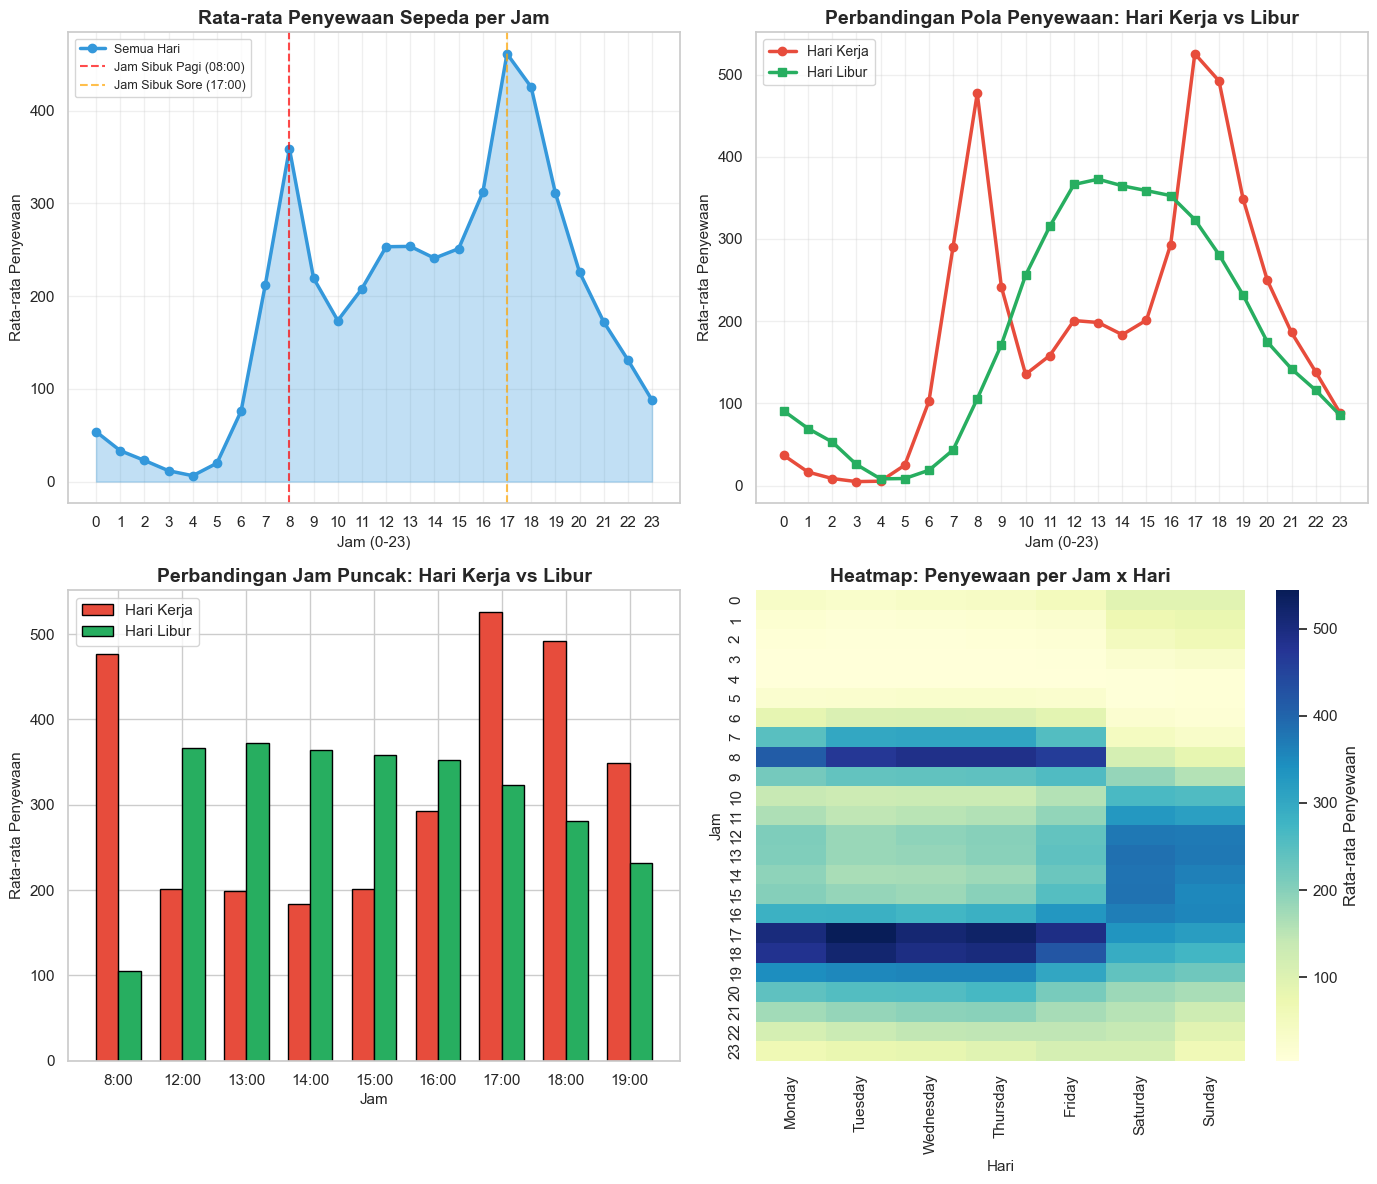

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Data preparation
workday_hourly = hour_df[hour_df['workingday']==1].groupby('hr')['cnt'].mean()
holiday_hourly = hour_df[hour_df['workingday']==0].groupby('hr')['cnt'].mean()
hourly_all = hour_df.groupby('hr')['cnt'].mean()

# 1. Line Chart - Pola per Jam (Keseluruhan)
axes[0,0].plot(hourly_all.index, hourly_all.values, marker='o', color='#3498db', 
               linewidth=2.5, markersize=6, label='Semua Hari')
axes[0,0].fill_between(hourly_all.index, hourly_all.values, alpha=0.3, color='#3498db')
axes[0,0].axvline(x=8, color='red', linestyle='--', alpha=0.7, label='Jam Sibuk Pagi (08:00)')
axes[0,0].axvline(x=17, color='orange', linestyle='--', alpha=0.7, label='Jam Sibuk Sore (17:00)')
axes[0,0].set_title('Rata-rata Penyewaan Sepeda per Jam', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Jam (0-23)', fontsize=11)
axes[0,0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0,0].set_xticks(range(0, 24))
axes[0,0].legend(loc='upper left', fontsize=9)
axes[0,0].grid(True, alpha=0.3)

# 2. Perbandingan Hari Kerja vs Libur
axes[0,1].plot(workday_hourly.index, workday_hourly.values, marker='o', color='#e74c3c', 
               linewidth=2.5, markersize=6, label='Hari Kerja')
axes[0,1].plot(holiday_hourly.index, holiday_hourly.values, marker='s', color='#27ae60', 
               linewidth=2.5, markersize=6, label='Hari Libur')
axes[0,1].set_title('Perbandingan Pola Penyewaan: Hari Kerja vs Libur', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Jam (0-23)', fontsize=11)
axes[0,1].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0,1].set_xticks(range(0, 24))
axes[0,1].legend(loc='upper left', fontsize=10)
axes[0,1].grid(True, alpha=0.3)

# 3. Grouped Bar - Top 5 Jam Tersibuk
top_hours_workday = workday_hourly.nlargest(5).sort_index()
top_hours_holiday = holiday_hourly.nlargest(5).sort_index()
all_top_hours = sorted(set(top_hours_workday.index) | set(top_hours_holiday.index))

x = np.arange(len(all_top_hours))
width = 0.35
vals_workday = [workday_hourly.get(h, 0) for h in all_top_hours]
vals_holiday = [holiday_hourly.get(h, 0) for h in all_top_hours]

bars1 = axes[1,0].bar(x - width/2, vals_workday, width, label='Hari Kerja', color='#e74c3c', edgecolor='black')
bars2 = axes[1,0].bar(x + width/2, vals_holiday, width, label='Hari Libur', color='#27ae60', edgecolor='black')
axes[1,0].set_title('Perbandingan Jam Puncak: Hari Kerja vs Libur', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Jam', fontsize=11)
axes[1,0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels([f'{h}:00' for h in all_top_hours])
axes[1,0].legend()

# 4. Heatmap - Jam x Hari dalam Seminggu
hour_df['weekday_name'] = hour_df['dteday'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_weekday = hour_df.pivot_table(values='cnt', index='hr', columns='weekday_name', aggfunc='mean')
pivot_weekday = pivot_weekday[weekday_order]
sns.heatmap(pivot_weekday, cmap='YlGnBu', ax=axes[1,1], cbar_kws={'label': 'Rata-rata Penyewaan'})
axes[1,1].set_title('Heatmap: Penyewaan per Jam x Hari', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Hari', fontsize=11)
axes[1,1].set_ylabel('Jam', fontsize=11)

plt.tight_layout()
plt.savefig('visualisasi_pertanyaan2.png', dpi=150, bbox_inches='tight')
plt.show()


**Insight Visualization & Explanatory Analysis:**

**Pertanyaan 1 - Pengaruh Musim & Cuaca:**
- Musim **Fall (Gugur)** mencatat rata-rata penyewaan tertinggi (~236/jam), kemungkinan karena suhu yang nyaman untuk bersepeda.
- Musim **Spring (Semi)** memiliki penyewaan terendah (~111/jam), mungkin karena cuaca yang masih tidak stabil setelah musim dingin.
- Cuaca **Clear** menghasilkan penyewaan 2-3x lipat dibanding cuaca berkabut atau hujan ringan.
- Kombinasi **Fall + Clear** adalah kondisi optimal untuk penyewaan sepeda.

**Pertanyaan 2 - Waktu Puncak & Perbandingan Hari:**
- **Hari Kerja** memiliki dua puncak jelas: jam **08:00** (berangkat kerja) dan **17:00-18:00** (pulang kerja) — pola tipikal commuter.
- **Hari Libur** memiliki puncak tunggal yang lebih landai di jam **12:00-15:00** — pola rekreasi/leisure.
- Akhir pekan (Sabtu-Minggu) menunjukkan pola serupa hari libur dengan aktivitas terpusat di siang hari.
- Jam-jam dini hari (00:00-05:00) memiliki penyewaan minimal di semua kategori hari.

## Analisis Lanjutan (Opsional)

Pada bagian ini, dilakukan dua teknik analisis tambahan untuk mendapatkan insight lebih dalam:
1. **CLUSTERING MANUAL**: Kategorisasi Pola Pengguna
Tujuan: Mengelompokkan jam/kondisi berdasarkan dominasi tipe pengguna
Kriteria:
- Casual-Dominant: rasio casual > 40%
- Balanced: rasio casual 20-40%
- Registered-Dominant: rasio casual < 20%

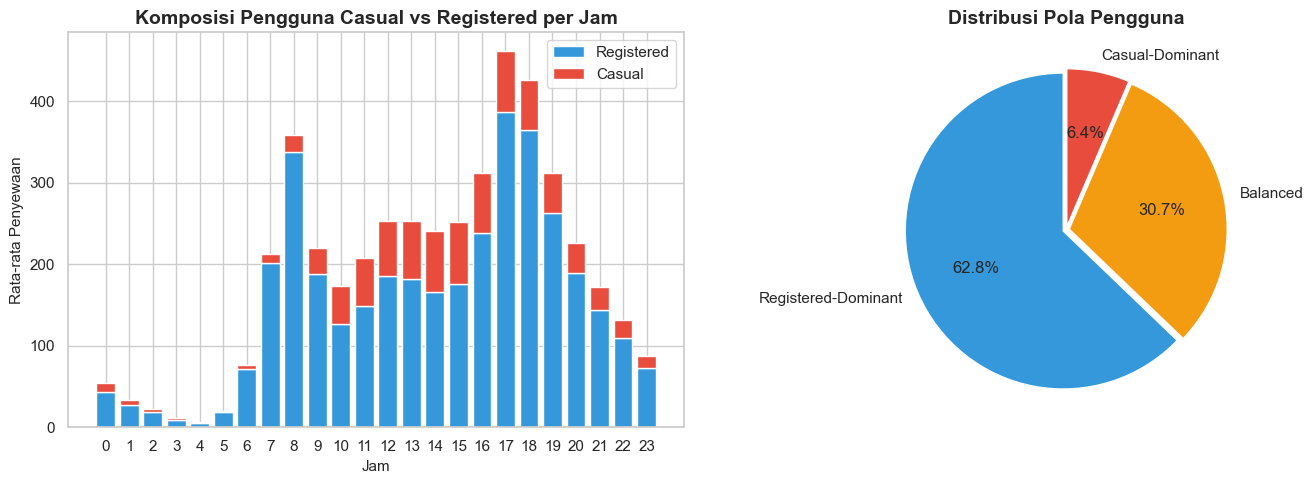

In [15]:
hour_df['casual_ratio'] = hour_df['casual'] / hour_df['cnt']
hour_df['casual_ratio'] = hour_df['casual_ratio'].fillna(0)

def categorize_user_pattern(ratio):
    if ratio > 0.4:
        return 'Casual-Dominant'
    elif ratio >= 0.2:
        return 'Balanced'
    else:
        return 'Registered-Dominant'

hour_df['user_pattern'] = hour_df['casual_ratio'].apply(categorize_user_pattern)

# Analisis per jam
hourly_pattern = hour_df.groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
    'casual_ratio': 'mean'
}).round(2)

# Visualisasi Clustering Manual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar - Komposisi pengguna per jam
axes[0].bar(hourly_pattern.index, hourly_pattern['registered'], label='Registered', color='#3498db')
axes[0].bar(hourly_pattern.index, hourly_pattern['casual'], bottom=hourly_pattern['registered'], 
            label='Casual', color='#e74c3c')
axes[0].set_title('Komposisi Pengguna Casual vs Registered per Jam', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Jam', fontsize=11)
axes[0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0].set_xticks(range(0, 24))
axes[0].legend()

# Pie chart - Distribusi pola pengguna
pattern_dist = hour_df['user_pattern'].value_counts()
colors_pie = ['#3498db', '#f39c12', '#e74c3c']
axes[1].pie(pattern_dist.values, labels=pattern_dist.index, autopct='%1.1f%%', 
            colors=colors_pie, explode=[0.02]*len(pattern_dist), startangle=90)
axes[1].set_title('Distribusi Pola Pengguna', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('clustering_manual.png', dpi=150, bbox_inches='tight')
plt.show()


**Insight Clustering Manual:**
- Mayoritas waktu didominasi pengguna Registered (commuter/langganan)
- Pola Casual-Dominant muncul di akhir pekan dan jam siang hari libur
- Jam sibuk (08:00, 17:00-18:00) sangat didominasi pengguna Registered

2. **BINNING**: Kategorisasi Intensitas Penyewaan
Tujuan: Mengelompokkan kondisi berdasarkan tingkat keramaian
Kriteria berdasarkan kuartil:
- Rendah: < Q1
- Sedang: Q1 - Q2 (median)
- Tinggi: Q2 - Q3
- Sangat Tinggi: > Q3


 Threshold Intensitas Penyewaan:
• Rendah: < 40
• Sedang: 40 - 142
• Tinggi: 142 - 281
• Sangat Tinggi: > 281


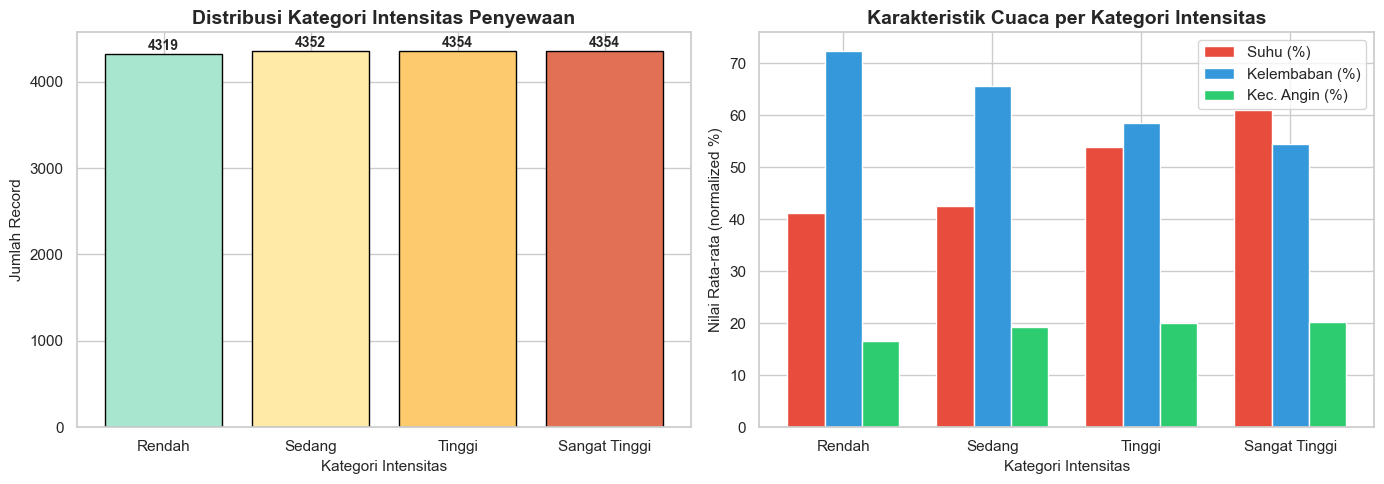


 Karakteristik per Kategori Intensitas:
                temp    hum  windspeed      cnt
intensity                                      
Rendah         0.413  0.724      0.166   14.947
Sedang         0.425  0.656      0.192   88.168
Tinggi         0.539  0.585      0.200  204.608
Sangat Tinggi  0.611  0.545      0.203  448.680

 Insight Binning Intensitas:
• Kategori 'Sangat Tinggi' terjadi saat suhu hangat (temp tinggi) dan kelembaban rendah
• Kategori 'Rendah' berkorelasi dengan suhu dingin, kelembaban tinggi, atau jam dini hari
• Kecepatan angin tidak menunjukkan perbedaan signifikan antar kategori


In [17]:
q1 = hour_df['cnt'].quantile(0.25)
q2 = hour_df['cnt'].quantile(0.50)
q3 = hour_df['cnt'].quantile(0.75)

def categorize_intensity(cnt):
    if cnt < q1:
        return 'Rendah'
    elif cnt < q2:
        return 'Sedang'
    elif cnt < q3:
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

hour_df['intensity'] = hour_df['cnt'].apply(categorize_intensity)

print(f"\n Threshold Intensitas Penyewaan:")
print(f"• Rendah: < {q1:.0f}")
print(f"• Sedang: {q1:.0f} - {q2:.0f}")
print(f"• Tinggi: {q2:.0f} - {q3:.0f}")
print(f"• Sangat Tinggi: > {q3:.0f}")

# Visualisasi Binning
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart - Distribusi intensitas
intensity_order = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
intensity_counts = hour_df['intensity'].value_counts().reindex(intensity_order)
colors_int = ['#a8e6cf', '#ffeaa7', '#fdcb6e', '#e17055']
bars = axes[0].bar(intensity_counts.index, intensity_counts.values, color=colors_int, edgecolor='black')
axes[0].set_title('Distribusi Kategori Intensitas Penyewaan', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kategori Intensitas', fontsize=11)
axes[0].set_ylabel('Jumlah Record', fontsize=11)
for bar, val in zip(bars, intensity_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                 f'{val}', ha='center', fontsize=10, fontweight='bold')

# Karakteristik per intensitas
intensity_chars = hour_df.groupby('intensity').agg({
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'cnt': 'mean'
}).reindex(intensity_order)

x = np.arange(len(intensity_order))
width = 0.25
axes[1].bar(x - width, intensity_chars['temp']*100, width, label='Suhu (%)', color='#e74c3c')
axes[1].bar(x, intensity_chars['hum']*100, width, label='Kelembaban (%)', color='#3498db')
axes[1].bar(x + width, intensity_chars['windspeed']*100, width, label='Kec. Angin (%)', color='#2ecc71')
axes[1].set_title('Karakteristik Cuaca per Kategori Intensitas', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kategori Intensitas', fontsize=11)
axes[1].set_ylabel('Nilai Rata-rata (normalized %)', fontsize=11)
axes[1].set_xticks(x)
axes[1].set_xticklabels(intensity_order)
axes[1].legend()

plt.tight_layout()
plt.savefig('binning_intensitas.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary tabel
print("\n Karakteristik per Kategori Intensitas:")
print(intensity_chars.round(3).to_string())

print("\n Insight Binning Intensitas:")
print("• Kategori 'Sangat Tinggi' terjadi saat suhu hangat (temp tinggi) dan kelembaban rendah")
print("• Kategori 'Rendah' berkorelasi dengan suhu dingin, kelembaban tinggi, atau jam dini hari")
print("• Kecepatan angin tidak menunjukkan perbedaan signifikan antar kategori")

**Insight Binning Intensitas:**
- Kategori 'Sangat Tinggi' terjadi saat suhu hangat (temp tinggi) dan kelembaban rendah
- Kategori 'Rendah' berkorelasi dengan suhu dingin, kelembaban tinggi, atau jam dini hari
- Kecepatan angin tidak menunjukkan perbedaan signifikan antar kategori

## EXPORT DATA UNTUK DASHBOARD 
- Simpan data yang sudah di-clean untuk dashboard

In [18]:
main_data = hour_df[['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 
                      'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
                      'casual', 'registered', 'cnt', 'hour_bin', 'user_pattern', 'intensity']]

main_data.to_csv('dashboard/main_data.csv', index=False)
print(" Data berhasil diekspor ke dashboard/main_data.csv")
print(f" Total records: {len(main_data)}")

 Data berhasil diekspor ke dashboard/main_data.csv
 Total records: 17379


## Conclusion

### Kesimpulan Pertanyaan 1: Pengaruh Musim dan Kondisi Cuaca

Berdasarkan analisis yang telah dilakukan, **musim dan kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda:**

1. **Musim Fall (Gugur)** merupakan musim dengan rata-rata penyewaan tertinggi, diikuti oleh Summer, Winter, dan Spring. Perbedaan antara musim tertinggi (Fall) dan terendah (Spring) mencapai lebih dari 2x lipat.

2. **Cuaca cerah (Clear)** menghasilkan jumlah penyewaan jauh lebih tinggi dibandingkan kondisi cuaca lainnya. Cuaca berkabut menurunkan penyewaan sekitar 20-30%, sedangkan hujan/salju ringan dapat menurunkan hingga 50%.

3. **Suhu (temperature)** memiliki korelasi positif kuat dengan jumlah penyewaan — semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.

4. **Kelembaban** memiliki korelasi negatif — kelembaban tinggi cenderung menurunkan minat penyewaan.

**Rekomendasi:** Penyedia layanan bike-sharing dapat meningkatkan ketersediaan unit di musim Fall dan saat cuaca cerah, serta mempertimbangkan promosi khusus di musim Spring untuk meningkatkan utilisasi.





### Kesimpulan Pertanyaan 2: Waktu Puncak dan Perbedaan Hari Kerja vs Libur

Analisis menunjukkan **pola waktu penyewaan yang berbeda secara signifikan antara hari kerja dan hari libur:**

1. **Hari Kerja** memiliki dua puncak yang jelas:
   - Puncak pagi: **08:00** (jam berangkat kerja)
   - Puncak sore: **17:00-18:00** (jam pulang kerja)
   - Pola ini menunjukkan penggunaan sepeda sebagai moda transportasi commuter.

2. **Hari Libur** memiliki pola berbeda:
   - Puncak tunggal yang lebih landai di **12:00-15:00**
   - Pola ini menunjukkan penggunaan sepeda untuk rekreasi/leisure activity.

3. **Pengguna Registered** mendominasi jam-jam sibuk di hari kerja, sementara proporsi **pengguna Casual** meningkat di akhir pekan dan jam siang.

4. Jam **00:00-05:00** (dini hari) memiliki penyewaan minimal di semua kategori hari.

**Rekomendasi:** 
- Untuk hari kerja: Pastikan ketersediaan sepeda maksimal di jam 07:00-09:00 dan 16:00-19:00.
- Untuk hari libur: Fokuskan layanan di jam 10:00-16:00.
- Program membership dapat ditargetkan ke pengguna commuter, sementara promosi harian/per-jam cocok untuk pengguna casual di akhir pekan.